#DATA VISUALISATION

While working with data, it can be difficult to truly understand your data when it’s just in tabular form. To understand what exactly our data conveys, and to better clean it and select suitable models for it, we need to visualize it or represent it in pictorial form. This helps expose patterns, correlations, and trends that cannot be obtained when data is in a table or CSV file.

The process of finding trends and correlations in our data by representing it pictorially is called Data Visualization. To perform data visualization in python, we can use various python data visualization modules such as Matplotlib, Seaborn, Plotly, etc.

# Matplotlib and Seaborn

Matplotlib and Seaborn are python libraries that are used for data visualization. They have inbuilt modules for plotting different graphs. While Matplotlib is used to embed graphs into applications, Seaborn is primarily used for statistical graphs.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [3]:
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target

#iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

#Rename for convinience
iris = iris_df


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#1. SCATTERPLOT

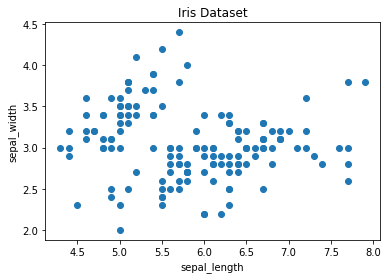

In [6]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
plt.savefig("Scatterplot3.png")
plt.show()

We can give the graph more meaning by coloring each data point by its class. This can be done by creating a dictionary that maps from class to color and then scattering each point on its own using a for-loop and passing the respective color.

In [ ]:
iris["class"].unique()

array([0, 1, 2])

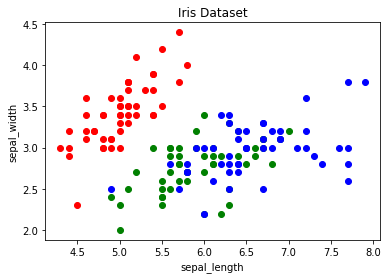

<Figure size 432x288 with 0 Axes>

In [ ]:
# create color dictionary
colors = {0:'r', 1:'g', 2:'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
plt.savefig('scatter_plot1.png')
plt.show()


# 1.2 SCATTER PLOT USING PANDAS

To create a scatter plot in Pandas, we can call <dataset>.plot.scatter() and pass it two arguments, the name of the x-column and the name of the y-column. Optionally we can also give it a title.

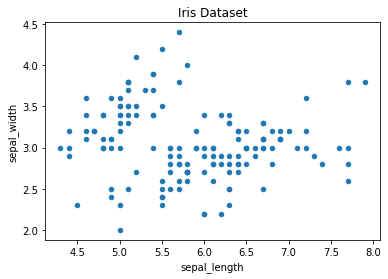

In [5]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')
plt.savefig('scatter_plot.png')
plt.show()

# 1.3 SCATTER PLOT USING SEABORN

We can use the .scatterplot method for creating a scatterplot, and just as in Pandas, we need to pass it the column names of the x and y data, but now we also need to pass the data as an additional argument because we aren’t calling the function on the data directly as we did in  Pandas.

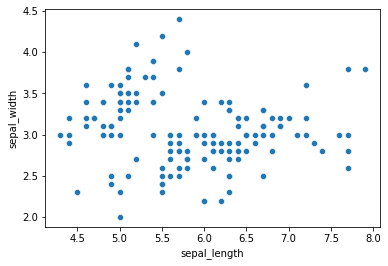

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

We can also highlight the points by class using the hue argument, which is a lot easier than in Matplotlib.


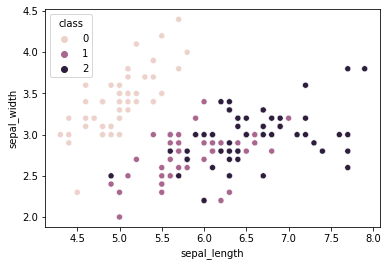

In [8]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

#2. LINE CHART

* A Line chart is a graph that represents information as a series of data points connected by a straight line. In line charts, each data point or marker is plotted and connected with a line or curve.

* In Matplotlib, we can create a line chart by calling the plot method. We can also plot multiple columns in one graph by looping through the columns we want and plotting each column on the same axis.

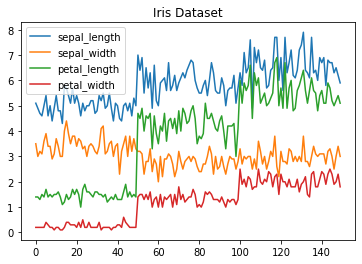

In [ ]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#2.2 LINE CHART USING PANDAS

To create a line chart in Pandas we can call <dataframe>.plot.line(). While in Matplotlib, we needed to loop through each column we wanted to plot, in Pandas we don’t need to do this because it automatically plots all available numeric columns (at least if we don’t specify a specific column/s).



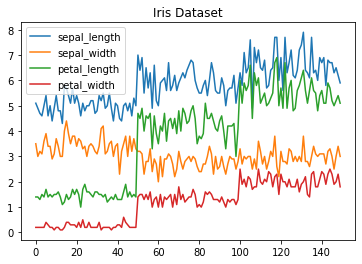

In [ ]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

If we have more than one feature, Pandas automatically creates a legend for us, as seen in the image above.

#2.2 LINE CHART USING PANDAS

To create a line chart, the sns.lineplot method can be used. The only required argument is the data, which in our case are the four numeric columns from the Iris dataset. We could also use the sns.kdeplot method, which smoothes the edges of the curves and therefore is cleaner if you have a lot of outliers in your dataset.

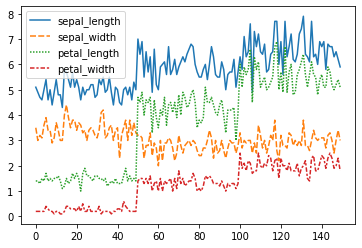

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

# 3. HISTOGRAM

In Matplotlib, we can create a Histogram using the hist method. If we pass categorical data like the points column from the wine-review dataset, it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

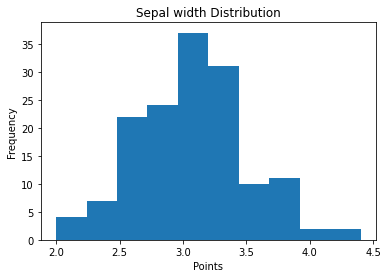

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(iris['sepal_width'])
# set title and labels
ax.set_title('Sepal width Distribution')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# 3.2 HISTOGRAM USING PANDAS

In Pandas, we can create a Histogram with the plot.hist method. There aren’t any required arguments, but we can optionally pass some like the bin size.

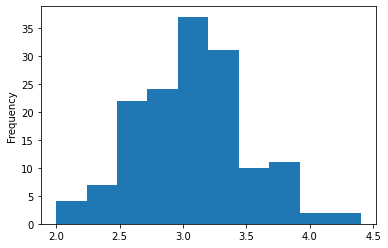

In [ ]:
iris['sepal_width'].plot.hist()

It’s also straightforward to create multiple histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcd53ff2d0>,
      dtype=object)

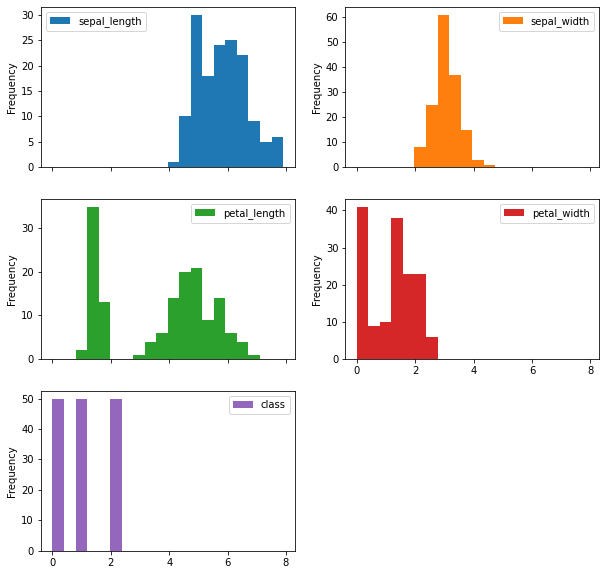

In [9]:
iris.plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)

The subplots argument specifies that we want a separate plot for each feature, and the layout specifies the number of plots per row and column.

## 3.3 HISTOGRAM USING SEABORN

To create a histogram in Seaborn, we use the sns.distplot method. We need to pass it the column we want to plot, and it will calculate the occurrences itself. We can also pass it the number of bins and if we want to plot a gaussian kernel density estimate inside the graph.

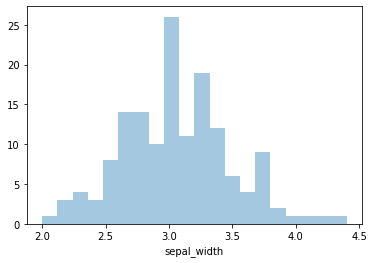

In [ ]:
sns.distplot(iris['sepal_width'], bins=20, kde=False)

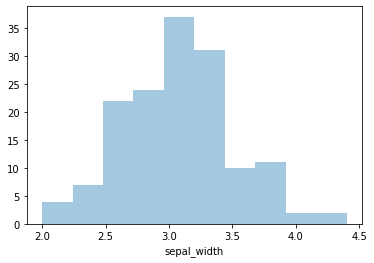

In [ ]:
sns.distplot(iris['sepal_width'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


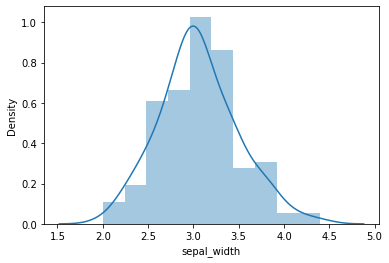

In [ ]:
sns.distplot(iris['sepal_width'], bins=10, kde=True)

# 4. BAR CHART

A bar chart can be created using the bar method. The bar chart isn’t automatically calculating the frequency of a category, so we will use pandas value_counts method to do this. The bar chart is useful for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

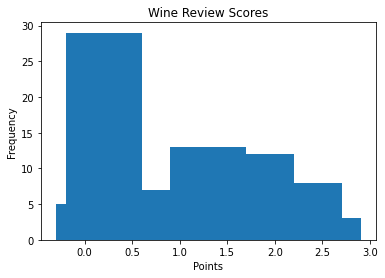

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = iris['petal_width'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

# 4.2 BAR CHART USING PANDAS

To plot a bar chart, we can use the plot.bar() method, but before calling this, we need to get our data. We will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.

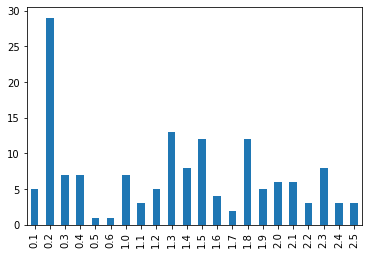

In [ ]:
iris['petal_width'].value_counts().sort_index().plot.bar()

It’s also really simple to make a horizontal bar chart using the plot.barh() method.


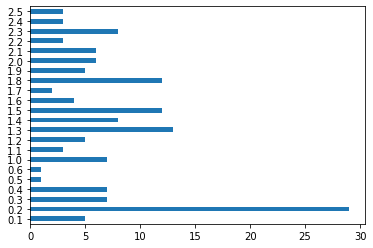

In [10]:
iris['petal_width'].value_counts().sort_index().plot.barh()

# 4.3 BAR CHART USING SEABORN

In Seaborn, a bar chart can be created using the sns.countplot method and passing it the data.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


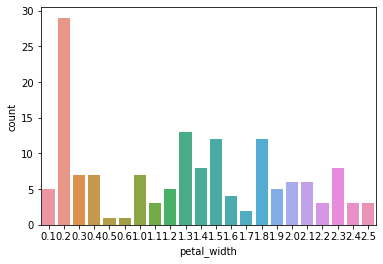

In [ ]:
sns.countplot(iris['petal_width'])

# Few Other Necessary graphs

* Now that you have a basic understanding of the Matplotlib, Pandas Visualization, and Seaborn syntax, We can further look at few other graph types that are useful for extracting information from data.

* Seaborn is the go-to library because of its high-level interface that allows for the creation of beautiful graphs in just a few lines of code.


# 5. BOX PLOTS

A Box Plot is a graphical method of displaying the five-number summary. We can create box plots using seaborn's sns.boxplot method and passing it the data as well as the x and y column names.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


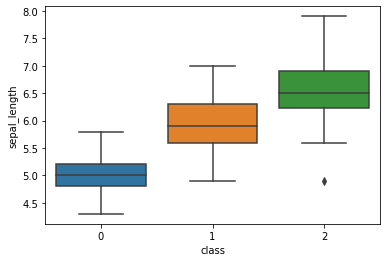

In [ ]:
#df = iris[(iris['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('class', 'sepal_length', data= iris)

# 6. HEATMAP

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.
To get the correlation of the features inside a dataset, we can call <dataset>.corr(), which is a Pandas dataframe method. This will give us the correlation matrix.
We can now use either Matplotlib or Seaborn to create the heatmap.

#6.1 HEATMAP USING MATPLOTLIB

In [11]:
import numpy as np

[None, None, None, None, None, None, None, None, None, None]

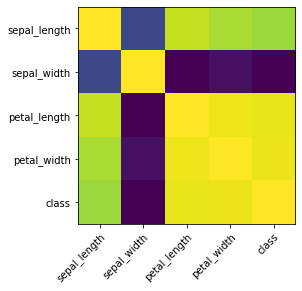

In [12]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

To add annotations to the heatmap, we need to add two for loops:

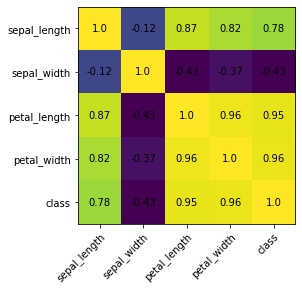

In [13]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
ha="center", va="center", color="black")

#6.2 HEATMAP USING SEABORN

Seaborn makes it way easier to create a heatmap and add annotations:

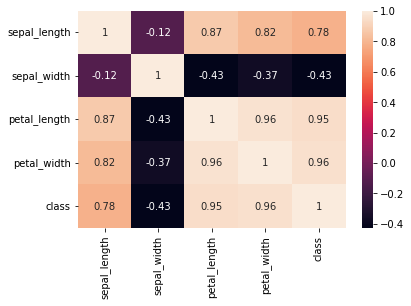

In [14]:
sns.heatmap(iris.corr(), annot=True)

# 6.3 HEATMAP WITH ANOTHER EXAMPLE

In [15]:
flight_data = sns.load_dataset("flights").pivot("month","year","passengers")
flight_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


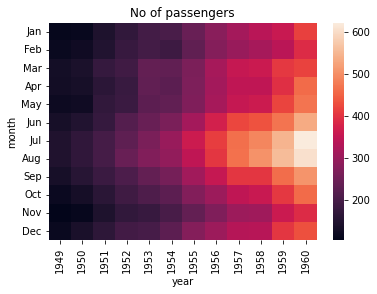

In [16]:
plt.title("No of passengers")
sns.heatmap(flight_data)

The brighter the color, the higher the footfall at the airport. By looking at the graph, we can infer that : 

The annual footfall for any given year is highest around July and August.
The footfall grows annually. Any month in a year will have a higher footfall when compared to the previous years.

Let's display the actual values in our heatmap and change the hue to blue. 

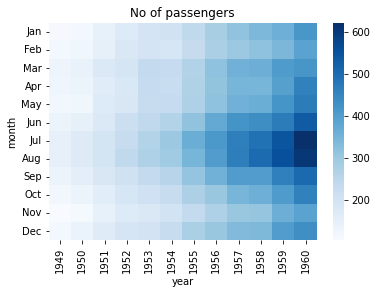

In [17]:
plt.title("No of passengers")
sns.heatmap(flight_data, cmap = "Blues")

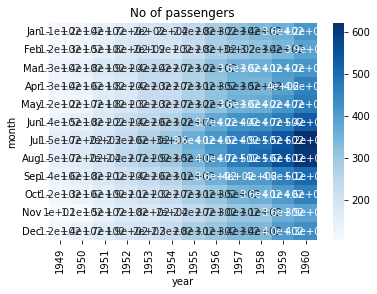

In [18]:
plt.title("No of passengers")
sns.heatmap(flight_data, cmap = "Blues", annot = True)

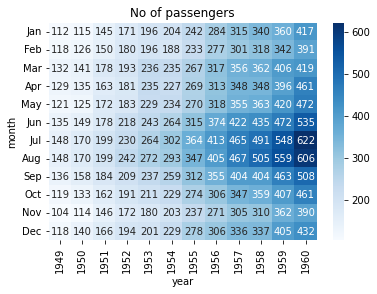

In [19]:
plt.title("No of passengers")
sns.heatmap(flight_data, cmap = "Blues", annot = True, fmt = "d")

# 7. FACETING

Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.
Faceting is helpful if you want to explore your dataset quickly.
To use one kind of faceting in Seaborn, we can use the FacetGrid. First of all, we need to define the FacetGrid and pass it our data as well as a row or column, which will be used to split the data. Then we need to call the map function on our FacetGrid object and define the plot type we want to use and the column we want to graph.

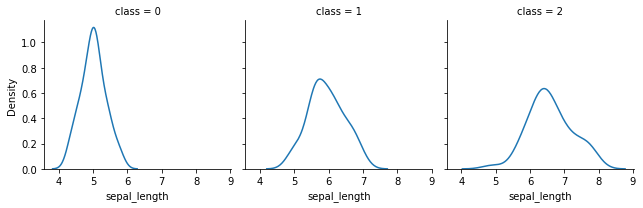

In [20]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

#8. PAIRPLOT

We will see Seaborns pairplot and Pandas scatter_matrix, which enable you to plot a grid of pairwise relationships in a dataset.

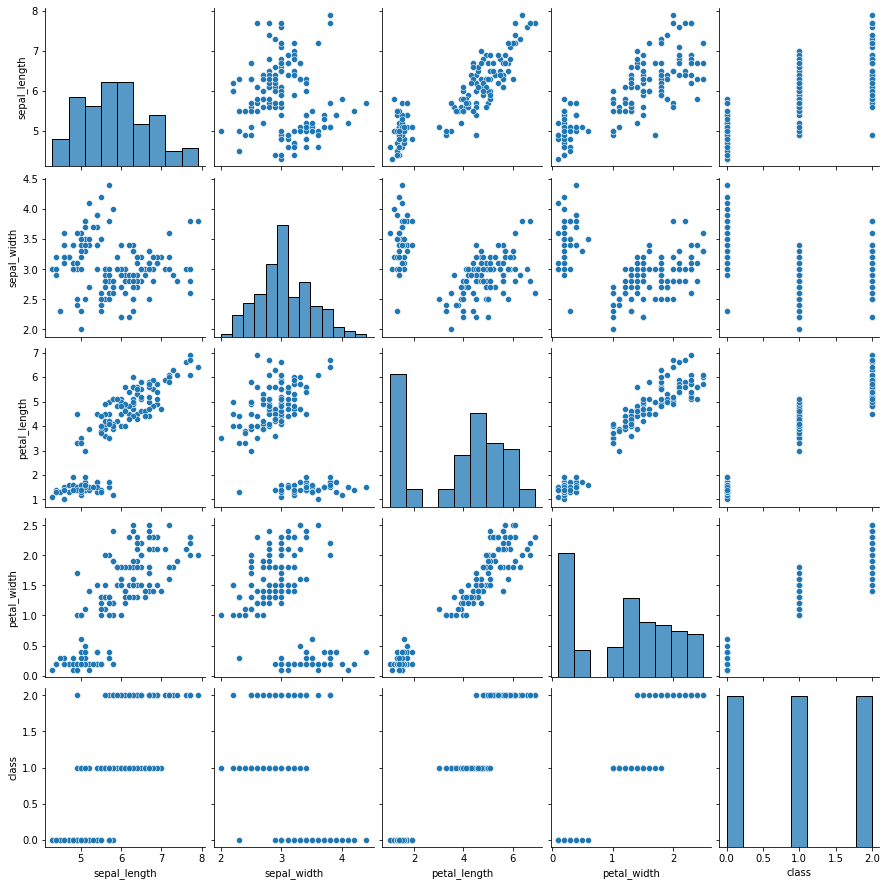

In [ ]:
sns.pairplot(iris)

We can see in the images above, these techniques are always plotting two features with each other. The diagonal of the graph is filled with histograms, and the other plots are scatter plots.

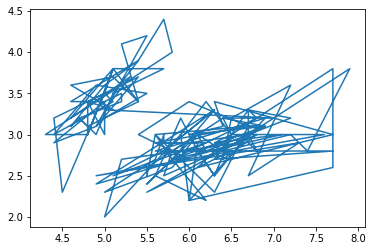

In [21]:
plt.plot(iris.sepal_length, iris.sepal_width)

# 9. SANKY DIAGRAM

In [22]:
import plotly.graph_objects as go

label = ["GENE1", "GENE2", "GENE3", "DISEASE1", "DISEASE2", "DISEASE"] #merge source and target columns into one list
# "GENE1" is encoded as 0, "GENE2" as 1 , "GENE3" as 2 , "DISEASE1" as 3, "DISEASE2" as 4, "DISEASE" as 5
start = [  0
         ?,  0,  0,  1,  1,  1,  2,  2,  2]  # The origin or the source nodes of the data 
end = [  3,  4,  5,  3,  4,  5,  3,  4,  5] # The destination or the target nodes of the data
weight =  [ 39, 41, 33, 38, 32, 18, 27, 14, 17] # The weight or width (quantity) of the links between source and target
link = dict(source = start, target = end, value = weight)
node = dict(label = label)
data = go.Sankey(node = node, link = link)
fig = go.Figure(data)
fig.show()

# 10. PCA

In [23]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

In [24]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

([], <a list of 0 Text major ticklabel objects>)

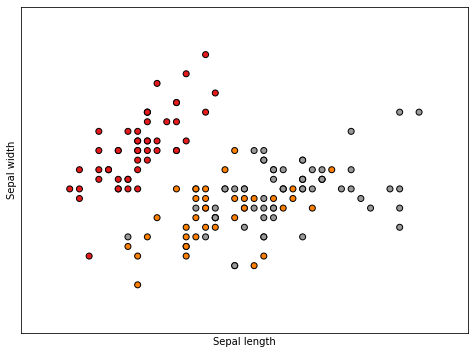

In [25]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

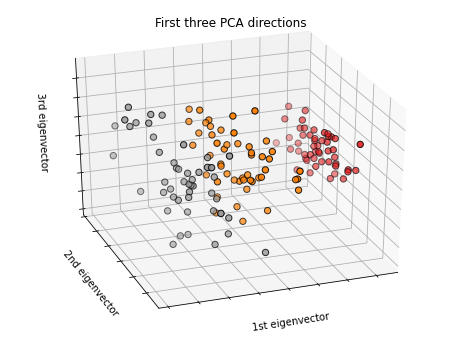

In [26]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#11. Valcano


https://plotly.com/python/volcano-plot/

https://www.reneshbedre.com/blog/volcano.html

https://thecodingbiologist.com/posts/Making-volcano-plots-in-python-in-Google-Colab